IMPORTING REQUIRED FILES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

READING THE DATA

In [2]:
data=pd.read_csv("D:/capstone project/crop.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2215,53,36,7,24.000000,92.000000,5.400000,251.200000,Broccoli
2216,65,13,12,19.000000,93.000000,7.200000,661.700000,Broccoli
2217,61,16,26,25.000000,91.000000,5.500000,233.500000,Broccoli
2218,42,45,24,23.000000,94.000000,6.400000,51.300000,Broccoli


In [3]:
data.count() #VALUES IN DATASET

N              2220
P              2220
K              2220
temperature    2220
humidity       2220
ph             2220
rainfall       2220
label          2220
dtype: int64

In [4]:
#DATAT INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2220 non-null   int64  
 1   P            2220 non-null   int64  
 2   K            2220 non-null   int64  
 3   temperature  2220 non-null   float64
 4   humidity     2220 non-null   float64
 5   ph           2220 non-null   float64
 6   rainfall     2220 non-null   float64
 7   label        2220 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 138.9+ KB


In [5]:
data.shape #SHAPE OF DATA

(2220, 8)

In [6]:
data.size #SIZE OF DATA

17760

In [7]:
data.columns #COLUMNS PRESENT IN DATASET

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
data.dtypes #DATA TYPES 

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
data.isnull().sum() #NULL VALUES IN DATA

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
data.isna().sum() #NA VALUES IN DATA 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.corr() #CORRELATION OF DATA 

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.230340,-0.140455,0.026556,0.183340,0.095675,0.060146
P,-0.230340,1.000000,0.736116,-0.124361,-0.113432,-0.137581,-0.071658
K,-0.140455,0.736116,1.000000,-0.158378,0.189725,-0.168343,-0.057737
temperature,0.026556,-0.124361,-0.158378,1.000000,0.199814,-0.016995,-0.036139
humidity,0.183340,-0.113432,0.189725,0.199814,1.000000,-0.011679,0.089315
ph,0.095675,-0.137581,-0.168343,-0.016995,-0.011679,1.000000,-0.104324
rainfall,0.060146,-0.071658,-0.057737,-0.036139,0.089315,-0.104324,1.000000


IMPORTING THE SEABORN FOR VISULIZATION

<AxesSubplot:>

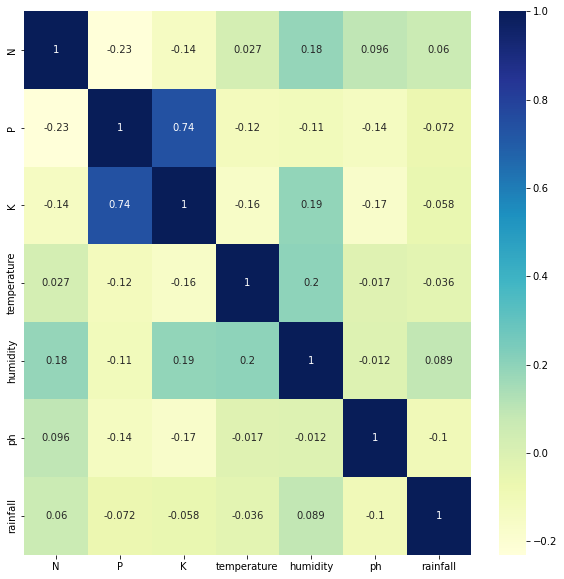

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) #SHOWING HEATMAP

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

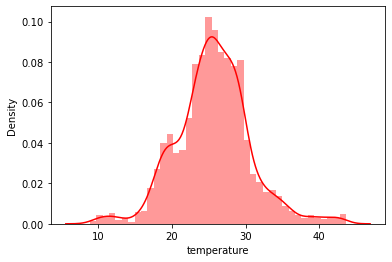

In [13]:
sns.distplot(data.temperature,color='red') #TEMPERATURE UNIVARITY

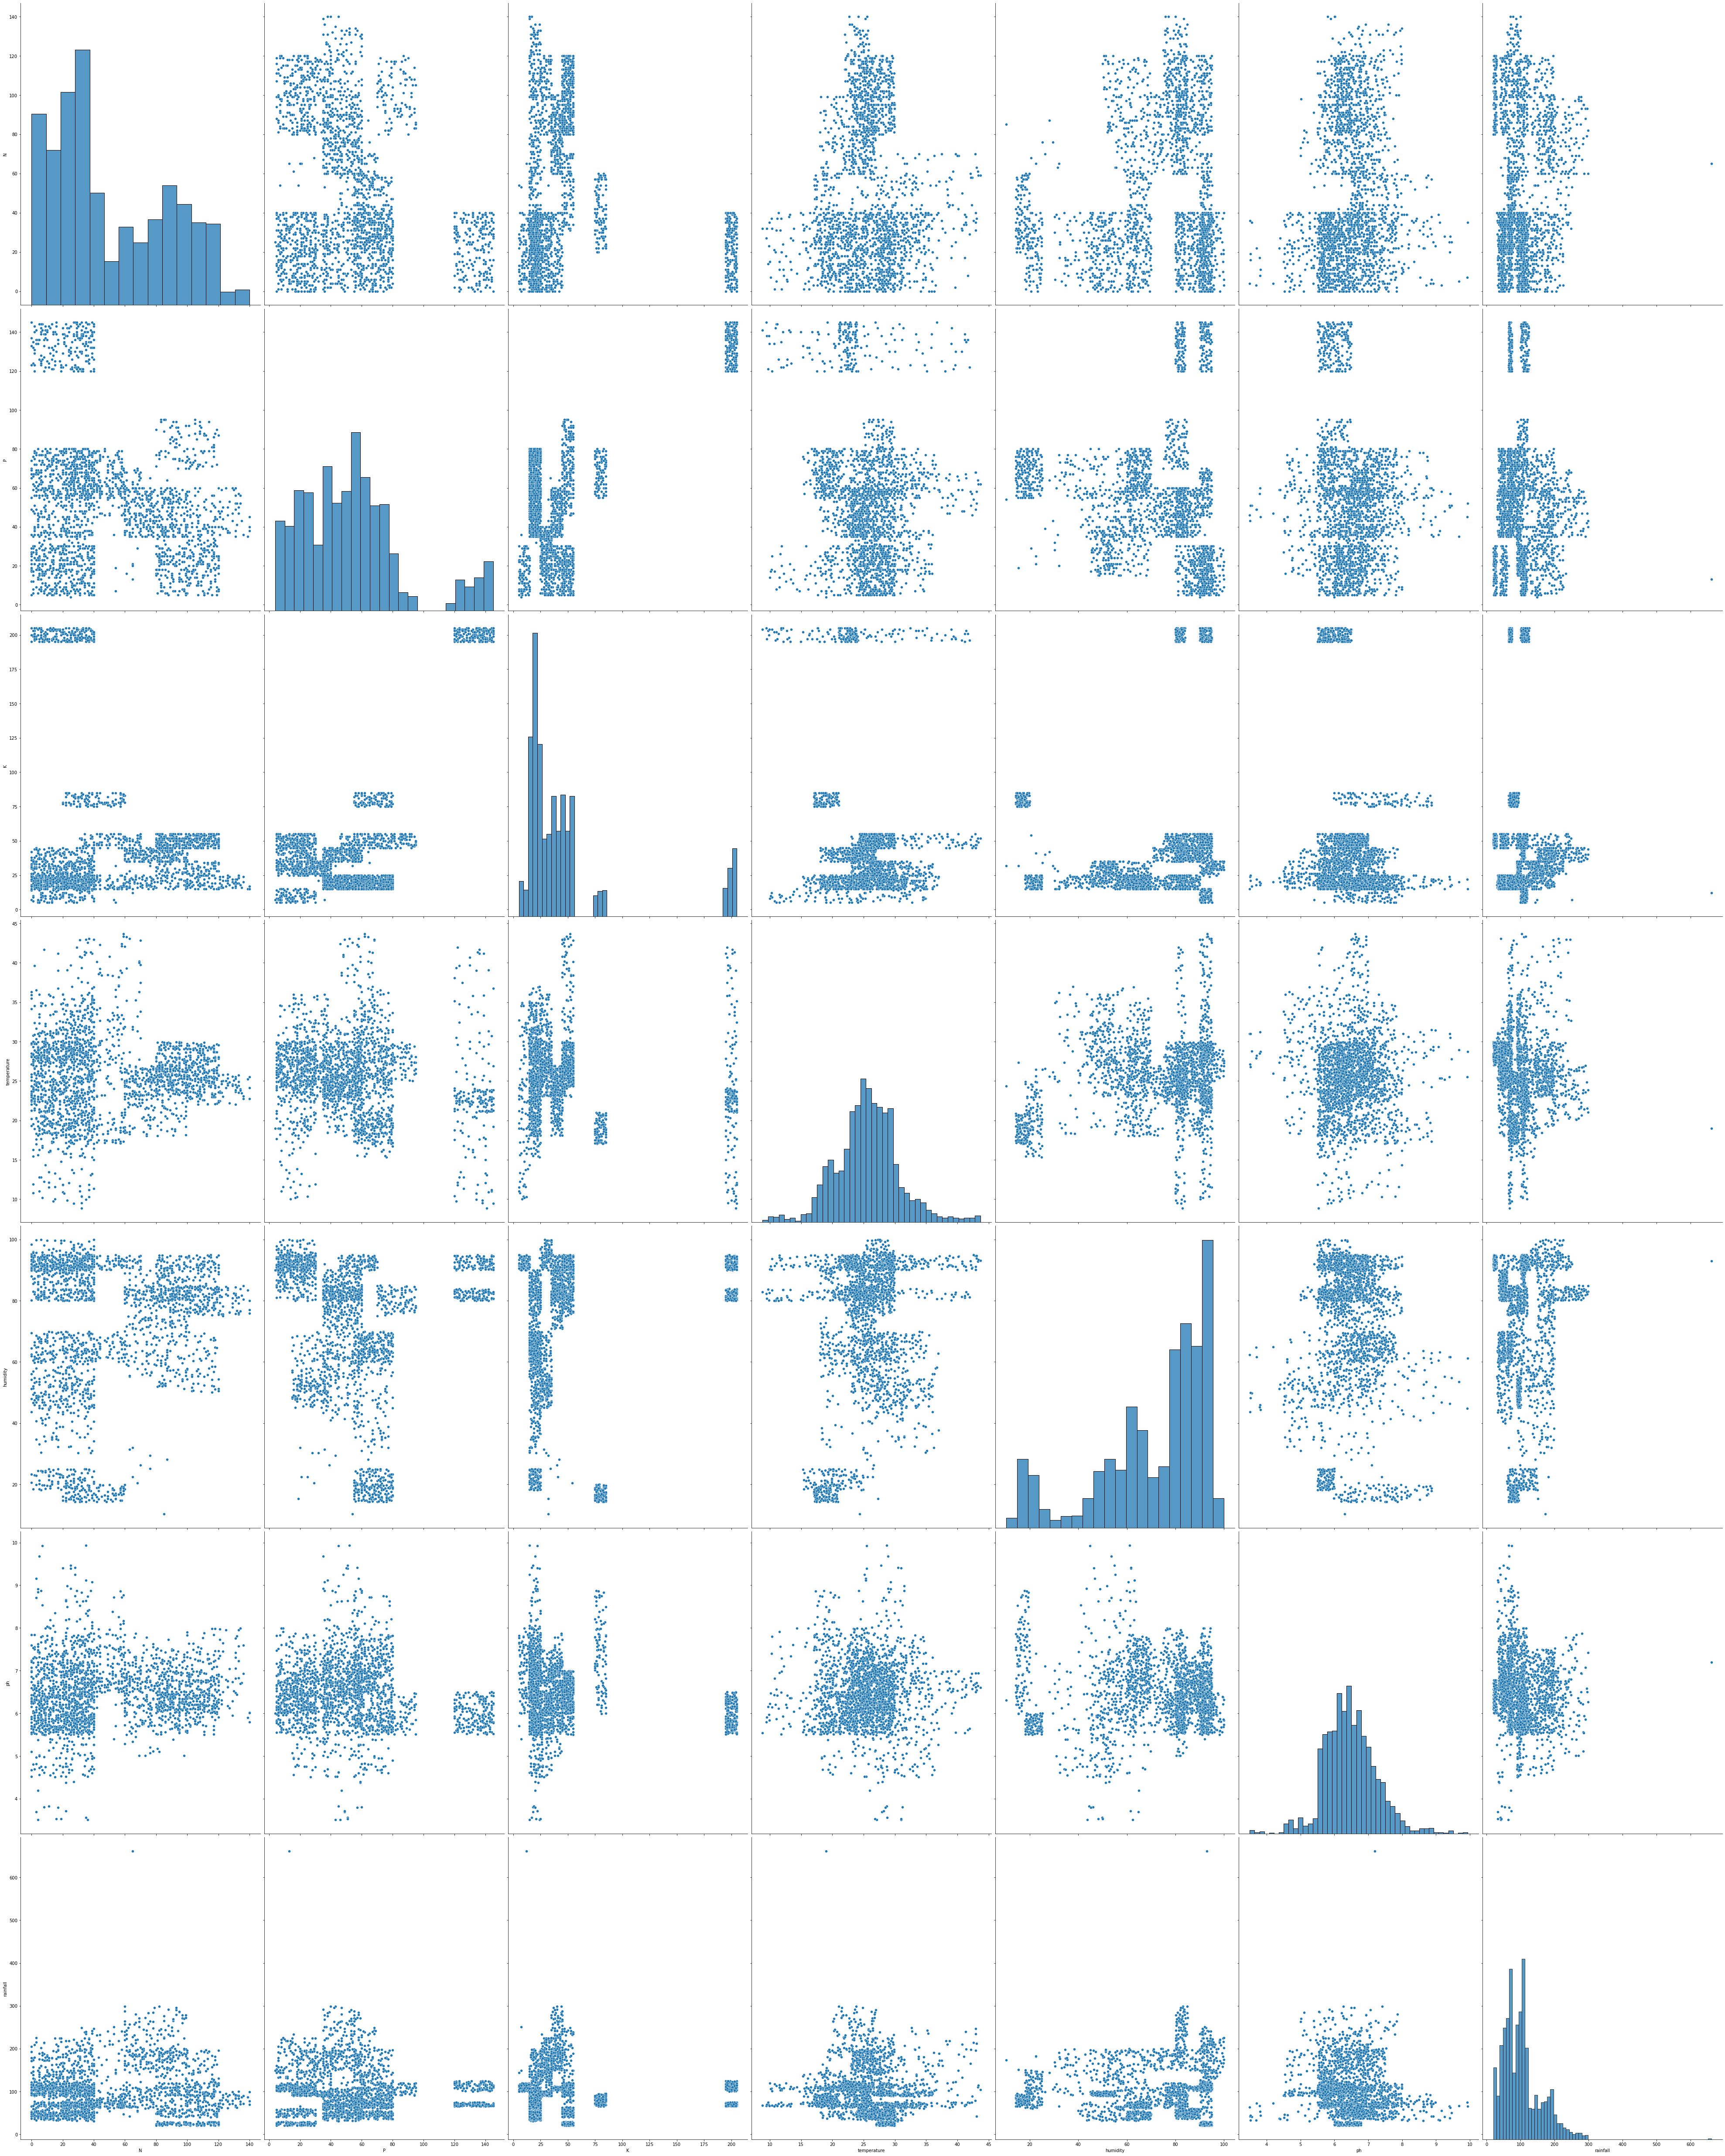

In [14]:
sns.pairplot(data,height=10,aspect=0.8) #RELATIONSHIP BETWEEN TWO MATRICS

In [15]:
#Assigning the X and Y values
x=data.drop(['label'],axis=1)
y=data['label']

In [16]:
#Splitting the train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1078,118,88,51,25.449262,79.492220,6.201912,100.661917
2211,39,25,25,26.456120,22.457810,7.400000,182.200000
122,74,56,22,18.283622,66.659528,6.829199,80.975733
1950,140,40,17,22.727672,77.075981,6.006086,77.551763
214,27,62,77,18.197370,14.710705,6.576416,70.181852
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [18]:
y_train

1078          banana
2211    Bitter gourd
122            maize
1950          cotton
214         chickpea
            ...     
1033          banana
1731          papaya
763        blackgram
835           lentil
1653          orange
Name: label, Length: 1554, dtype: object

In [19]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1986,118,44,23,22.084583,82.829041,6.691690,67.064598
98,78,35,44,26.543481,84.673536,7.072656,183.622266
1275,8,136,201,41.656030,82.221182,5.609256,74.196648
575,27,59,20,28.009374,52.609500,4.397699,36.012030
39,63,44,41,24.172988,83.728757,5.583370,257.034355
...,...,...,...,...,...,...,...
2193,116,38,34,23.292503,50.045570,6.020947,183.468585
1192,8,37,33,28.078027,54.964053,6.128168,97.453736
1631,33,12,15,30.255780,92.032728,6.052318,116.717313
1907,121,45,22,22.459429,81.306810,6.443785,64.230266


In [20]:
y_test

1986       cotton
98           rice
1275       grapes
575     mothbeans
39           rice
          ...    
2193       coffee
1192        mango
1631       orange
1907       cotton
1277       grapes
Name: label, Length: 666, dtype: object

In [21]:
#List for storing accuracy and classification report
models=[]
accuracy=[]

In [22]:
#importing Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
# build the model
gnb = GaussianNB()

# define the ovr strategy
GNB = OneVsRestClassifier(gnb)

# fit the model
GNB.fit(x_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [23]:
y_pred = GNB.predict(x_test)

In [24]:
#Accuracy Score, Confusion matrix and Classification report 
x=accuracy_score(y_test,y_pred)
accuracy.append(x)
print(x)
# compute the confusion matrix
confusion_matrix(y_test, y_pred)

0.9954954954954955


array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

In [25]:
models.append('GNB')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

Bitter gourd       1.00      1.00      1.00         4
    Broccoli       1.00      1.00      1.00         1
       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        31
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        28
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00    

In [26]:
dict1={'Model':"Random Forest Classifer",
       "Accuracy Score":x*100
}
nb=pd.DataFrame(dict1,index=[1])

In [27]:
#importing pickle file to storing the values for deployment
import pickle

NB_pkl_filename = 'NBClassifier.pkl'

with open(f'D:/capstone project/crop products/{NB_pkl_filename}', 'wb') as NB_Model_pkl:
    pickle.dump(GNB, NB_Model_pkl)

In [28]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(x_train,y_train)

ypred= model.predict(x_test)

#Accuracy Score
x=accuracy_score(y_test,ypred)
accuracy.append(x)
print(x)

#classification Report
models.append('model')
print(classification_report(y_test,ypred))

0.9924924924924925
              precision    recall  f1-score   support

Bitter gourd       1.00      0.50      0.67         4
    Broccoli       1.00      1.00      1.00         1
       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        31
   blackgram       0.96      0.96      0.96        28
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        28
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        17
       maize       0.93      1.00      0.96        27
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.97      0.99        38
    mungbean       1.00      1.00      1.00        31
   muskm

In [29]:
#importing pickle file to storing the values for deployment
import pickle

RF_pkl_filename = 'RFClassifier.pkl'

with open(f'D:/capstone project/crop products/{RF_pkl_filename}', 'wb') as RF_Model_pkl:
    pickle.dump(model, RF_Model_pkl)

In [30]:
dict2={'Model':"Random Forest Classifer",
       "Accuracy Score":x*100
}
rf=pd.DataFrame(dict2,index=[1])

In [31]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y__pred=model1.predict(x_test)
model.predict_proba(x_test)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.35, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [33]:
x=accuracy_score(y_test,y__pred)
accuracy.append(x)
print(x)

#classification Report
models.append('model')
print(classification_report(y_test,y__pred))

0.984984984984985
              precision    recall  f1-score   support

Bitter gourd       1.00      0.75      0.86         4
    Broccoli       0.00      0.00      0.00         1
       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        31
   blackgram       0.96      0.96      0.96        28
    chickpea       0.94      1.00      0.97        32
     coconut       1.00      0.97      0.99        35
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        28
        jute       0.96      0.96      0.96        28
 kidneybeans       1.00      0.93      0.96        27
      lentil       1.00      0.94      0.97        17
       maize       0.93      1.00      0.96        27
       mango       1.00      1.00      1.00        26
   mothbeans       0.97      0.97      0.97        38
    mungbean       1.00      1.00      1.00        31
   muskme

In [34]:
import pickle

DT_pkl_filename = 'DTClassifier.pkl'

with open(f'D:/capstone project/crop products/{DT_pkl_filename}', 'wb') as DT_Model_pkl:
    pickle.dump(model, DT_Model_pkl)

In [35]:
dict3={'Model':"Decision Tree Classifer",
       "Accuracy Score":x*100
}
dt=pd.DataFrame(dict3,index=[2])

In [36]:
result=pd.concat((nb,rf,dt),keys=['Naive Bayes','Random Forest','Decision Tree'])
result

,,Model,Accuracy Score
Naive Bayes,1,Random Forest Classifer,99.549550
Random Forest,1,Random Forest Classifer,99.249249
Decision Tree,2,Decision Tree Classifer,98.498498


In [37]:
#testing it with values
data1 = np.array([[40,20, 20, 23.603016, 60.3, 6.7, 140.91]])
prediction = GNB.predict(data1)
print(prediction)

['maize']


C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ga

In [38]:
#testing it with values
data1 = np.array([[40,20, 20, 23.603016, 60.3, 6.7, 140.91]])
prediction = model.predict(data1)
print(prediction)

['Bitter gourd']


C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
data1 = np.array([[40,20, 20, 23.603016, 60.3, 6.7, 140.91]])
prediction = model1.predict(data1)
print(prediction)

['mango']


C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
